# Fuel Consumption Prediction of Vehicles

## Objective
The goal of this project is to predict the **fuel consumption (MPG)** of vehicles based on their attributes, including engine specifications, weight, and acceleration.

## Dataset Overview
The dataset contains records of vehicles with features relevant to fuel efficiency prediction.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for fuel efficiency.
4. **Model Training**: Train a regression model to predict fuel consumption (MPG).
5. **Evaluation**: Assess model performance using RMSE and R² score.

In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


In [4]:

# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


/tmp/ipython-input-1521891132.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286    0 30286    0     0  78844      0 --:--:-- --:--:-- --:--:-- 78869


In [6]:
# Load the dataset (auto-mpg.data file)
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    int64  
 1   cylinders     398 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    int64  
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 28.0+ KB


/tmp/ipython-input-429288569.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

Missing values per column:
mpg             0
cylinders       0
displacement    6
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


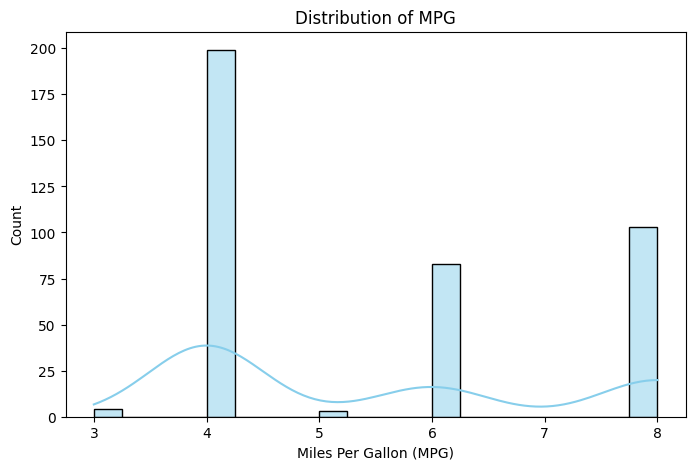

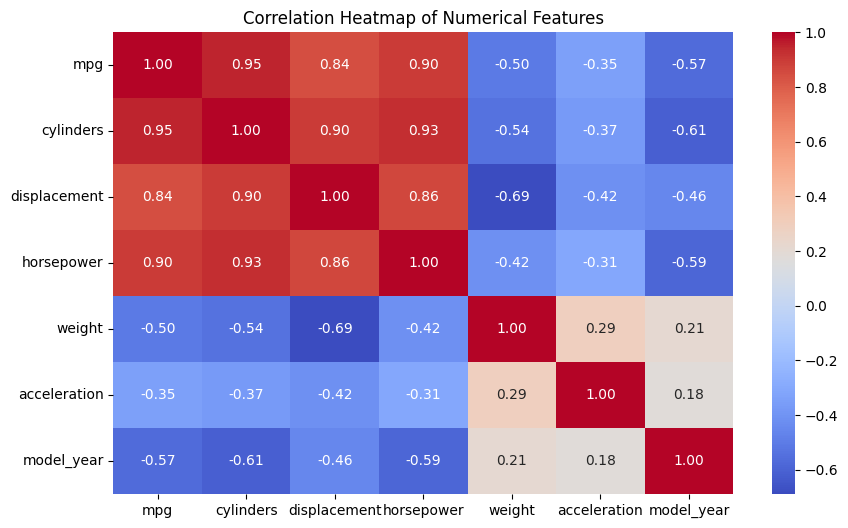

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 2) Drop rows with missing values (if any remain)
df = df.dropna()

# 3) Visualize MPG distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["mpg"], bins=20, kde=True, color="skyblue")
plt.xlabel("Miles Per Gallon (MPG)")
plt.title("Distribution of MPG")
plt.show()

# 4) Correlation heatmap (numerical features only)
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [8]:
# 1) Encode categorical variables (Origin as categorical feature)
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# 2) Define features (X) and target (y)
target_col = "mpg"
X = df.drop(columns=[target_col])
y = df[target_col]

# 3) Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (313, 306)
Test shape: (79, 306)


## Model Training
Train a **Linear Regression** model to predict fuel consumption.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ==========================
# Model Training & Evaluation
# ==========================

# 1) Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2) Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 3) Predictions
y_pred = model.predict(X_test_scaled)

# 4) Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")


Linear Regression Evaluation:
MAE:  0.682
RMSE: 0.909
R²:   0.723
